# Q-Learning
For this example, we use the Q-Learning algorithm to train an agent to navigate an environment from the Open AI Gym. The Open AI Gym provides unique environments for programmers to practise machine learning.

In [3]:
!pip3 install gym
#import sys
#sys.path.append('c:\\users\\hp\\appdata\\local\\programs\\python\\python39\\lib\s\ite-packages')

import gym
# We'll use the FrozenLake environment
env = gym.make('FrozenLake-v1')

There are a few other commands to interat & get info about the environment.

In [4]:
print(env.observation_space.n) # Get no. of states
print(env.action_space.n) # Get no. of actions per state

16
4


In [5]:
env.reset() # reset environment to default state 0

0

In [6]:
action = env.action_space.sample() # get a random action
print(action)

2


In [7]:
# take action, take note of info that it returns
next_state, reward, done, info = env.step(action)
# done = Did we win the game yet?

In [8]:
!pip3 install gym[toy_text]
env.render() # render environment's GUI

### Build the Q-table

In [9]:
import gym
import numpy as np
import time

STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [10]:
# create a Q-table of 0s 1st
Q = np.zeros((STATES, ACTIONS))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Constants

In [11]:
EPISODES = 10000 # how many times to run env from the beginning
MAX_STEPS = 100 # max no. of steps allowed for each run of env
# MAX_STEPS in case we get stuck oscillating between 2 states or in cycles

LEARNING_RATE = 0.81 # the higher, the greater each change is in the Q-table, the faster
GAMMA = 0.96 # the higher, the more focus put on future rewards

### Picking an action

In [12]:
epsilon = 0.9
# start with 90% chance of picking random action
# 10% chance we'll look at Q-table to pick action

# code to pick action
if np.random.uniform(0,1) < epsilon:
    action = env.action_space.sample() # take random action
else:
    action = np.argmax(Q[state, :]) # take best action based on current Q-table

### Updating Q values
The code table implements formula for updating Q-table.

In [ ]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

### Putting the pieces together

In [14]:
RENDER = False

rewards = []
for episode in range(EPISODES):
    state = env.reset()

    for _ in range(MAX_STEPS):
        if RENDER:
            env.render()
        
        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
        
        next_state, reward, done, _ = env.step(action)

        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

        state = next_state
        if done:
            rewards.append(reward)
            epsilon -= 0.001
            break


print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}")

[[3.84607261e-01 1.50932289e-02 1.52713221e-02 1.25056704e-02]
 [2.92218685e-03 5.93211083e-03 3.07372280e-03 2.43936295e-01]
 [1.58418977e-03 3.30917384e-03 6.32463580e-03 1.43188318e-01]
 [5.00768670e-03 4.31463153e-03 1.53806241e-04 6.56676533e-02]
 [3.82497464e-01 3.27480784e-03 9.93702236e-03 6.83594586e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.09151927e-01 2.28143643e-05 6.96481291e-06 2.65462783e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.43102907e-03 3.07075843e-03 6.59797599e-03 3.14720017e-01]
 [2.41813653e-03 6.76691320e-01 3.30661284e-03 1.94917955e-03]
 [9.17412359e-01 9.44873019e-04 4.12876044e-04 5.90154510e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.88718605e-02 1.89437876e-02 2.99671054e-01 2.89107784e-02]
 [1.49536943e-01 9.97250431e-01 1.53169731e-01 1.45673494e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

### Visualise training process

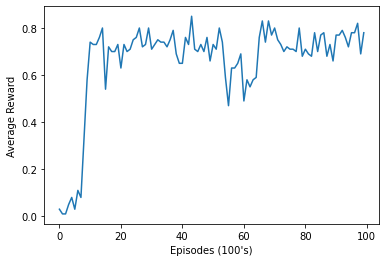

In [15]:
import matplotlib.pyplot as plt

def get_average(values):
    return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('Average Reward')
plt.xlabel("Episodes (100\'s)")
plt.show()